## Volume of hypersphere
The volume of a unit sphere in N dimensions is defined as:
$$
V_N = \int_{R^N}dx1\cdot dx2.......dxN \cdot \theta (1-r^2)
$$
where, \theta is the Heaviside step function. In the computation, it is assumed that the hyperspace is contained within a hypercube in the range $[-1,1]^N$, which is possible due to the symmetry of the sphere. Later on the project, numerical integration using rectangular approximation and Monte Carlo approximation is carried out to achieve the approximations to the volume of hyperspheres of various dimensions.

### Rectangular Approximation
This approximation take N dimensions and the total number of distinct integration points $n_p$ as the input, where these $n_p$ constitute a regular grid of points in N dimensions with $n_p^\frac{1}{N}$ distinct points in each dimension.

### Monte Carlo Approximation
With this approximation, the same number of points $n_p$ is used. However, the function randomly samples $n_p$ positions r from the integration volume.

Similarly, the volume of the hypersphere ($V_N$) calculated using Rectangular approximation and Monte Carlo approximation were compared to the analytical solution. 

In the next part of the project, for different values of $n_p$ and N, $V_N$ was calculate using Rectangular approximation. The error was calculated comparting with the analytical solution and the error was plotted as the function of $n_p$ on a log-log plot. It was clearly noted that for N = 2, the graph showed perfectly linearly decreasing slope, which was not the case for other values of N. To the curves obtained for various values of N, straight lines were fitted to extract the power-law exponents where the power-law equation is often represented as:
$$
Y = MX^B
$$
Y is the function(the result), X is the variable and B is the order of scaling(the exponent), and M is a constant.

In the final part of the project, for each combination of the given N and $n_p$, $V_N$ is computed using Monte Carlo integration for 20 times. From the set of estimates the variance was computed and plotted against $n_p$ on a log-log plot for various N values. Again the straight lines were fit to the different curves to extract the power-law exponents. With the fitted straight lines, it was noted that for the dimension N = 3, a linearly decreasing slope was observed with higher B value, which we can conclude to be the lowest dimension where a Monte Carlo stimulation can be prefered in the large-N limit.

In [508]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
import itertools


def theta(x):
    if x > 0:
        return 1
    else:
        return 0

def VN(r, N):
    r_sq = 0
    for i in range(N):
        r_sq+= r[i]**2
        #print (theta(1- r_sq))
    return theta(1-r_sq)

def RecApprox(N, n_p):
    n_p_each_dim = int(n_p**(1/N))
    #print('n_p = ', n_p_each_dim)
    dist_pts_each_dim = np.linspace(-1,1,n_p_each_dim)
    #print('n_l = ', len(dist_pts_each_dim))
    q, r_arr  = [], []
    for x in list(itertools.combinations_with_replacement(dist_pts_each_dim, N)):
        q.append(set(itertools.permutations(x)))
    for i in range(len(q)):
        for j in(q[i]):
            r_arr.append(j)
    #print('r = ',len( r_arr))
    integral = 0
    for r in r_arr:
        integral+= VN(r, N)
    return 2**N*integral/len(r_arr)




In [509]:
#Monte Carlo integration
def MCI(N, total_points):
    r_array = np.random.uniform(-1, 1, size = (int(total_points),int(N)))
    integral = 0
    for r in r_array:
        integral+= VN(r,N)
    return 2**N*integral/len(r_array)



In [461]:
N = 2
total_points = 10**3+1
print(RecApprox(N, total_points))
print(MCI(N, total_points))

2.9011446409989596
3.108891108891109


In [463]:
#Analytical solution
def V(n):
    if (n == 0):
        return 1
    elif (n == 1):
        return 2
    else:
        return 2*np.pi/n*(V(n-2))


In [524]:
V(2)

3.141592653589793

n= 2, power-law exponenet: M = 10.814374, B = -0.559
n= 3, power-law exponenet: M = 7.986731, B = -0.238
n= 4, power-law exponenet: M = 7.567578, B = -0.134
n= 5, power-law exponenet: M = 7.018589, B = -0.083
n= 6, power-law exponenet: M = 6.224006, B = -0.046


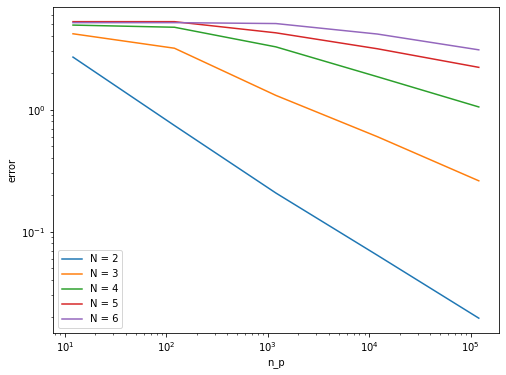

In [464]:
#Power-law-exponent

def curve(x, m , b):
    return m*x**b


x = 6
n_p = []
for i in range(1,x):
    x_ = math.pow(10,i)
    x_+= 0.2*x_
    n_p.append(x_)

N = np.arange(2,7)

plt.figure(figsize = (8,6))
params = []
for n in N:
    err = []
    for tp in n_p:
        error = (np.abs(RecApprox(n, tp) - V(n)))
        err. append(error)
    plt.plot(n_p, err, label = f'N = {n}')
    param, pcov = scipy.optimize.curve_fit(curve, n_p, err)
    params.append(param)
    print(f'n= {n}, power-law exponenet: M = {param[0]:3f}, B = {param[1]:.3f}')

plt.xlabel('n_p')
plt.ylabel('error')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


<ipython-input-522-cad1a0e16fbc>:4: RuntimeWarning: overflow encountered in power
  return m*x**b


n= 2, power-law exponenet: M = 2.711229, B = -0.469
n= 3, power-law exponenet: M = 0.494644, B = -0.611
n= 4, power-law exponenet: M = 9.933073, B = -0.475
n= 5, power-law exponenet: M = 8.831513, B = -0.501
n= 6, power-law exponenet: M = 14.004209, B = -0.526


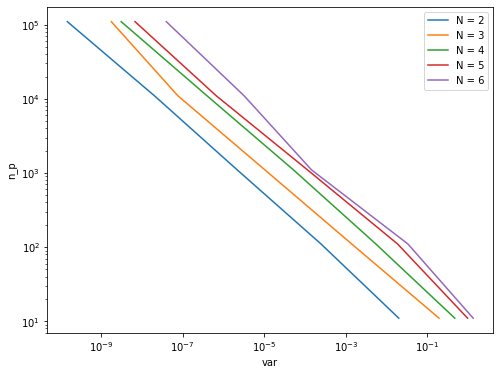

In [522]:
#Monte-Carlo_integration (Power-law-exponents)

def curve(x, m , b):
    return m*x**b

x = 6
total_points = []
for i in range(1,x):
    x_ = math.pow(10,i)
    x_+= 0.1*x_
    total_points.append(x_)
N = np.arange(2,7)

plt.figure(figsize = (8,6))
params = []
for n in N:
    var = []
    for tp in total_points:
        MC_i = []
        for i in range(20):
            Monte = MCI(n,tp)
            MC_i.append(Monte)
        var.append(np.var(MC_i)/tp)



    plt.plot(var, total_points, label = f'N = {n}')
    param, pcov = scipy.optimize.curve_fit(curve, var, total_points)
    params.append(param)
    print(f'n= {n}, power-law exponenet: M = {param[0]:3f}, B = {param[1]:.3f}')

plt.xlabel('var')
plt.ylabel('n_p')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


            
